## Importing libraries

In [ ]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

## Connecting to the database

In [5]:
cursor = conn.cursor()
conn.autocommit = True

## Pasting the data into a dataframe

In [6]:
cursor.execute('SELECT * FROM campaigns')
dt = cursor.fetchall()
columns = ['user_id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome', 'teenhome', 'dt_enrolled', 'recency', 'amt_wine', 'amt_fruit', 'amt_meat', 'amt_fish', 'amt_sweet', 'amt_gold', 'discount_purchases', 'web_purchases', 'catalog_purchases', 'store_purchases', 'web_visits_mnth', 'cmp1_accepted', 'cmp2_accepted', 'cmp3_accepted', 'cmp4_accepted', 'cmp5_accepted', 'complain', 'response', 'age', 'total_kids', 'total_spent', 'total_purchases', 'income_level']
df = pd.DataFrame(dt, columns = columns)
cursor.close()
conn.close()

In [7]:
df.head()

,user_id,year_birth,education,marital_status,income,kidhome,teenhome,dt_enrolled,recency,amt_wine,...,cmp3_accepted,cmp4_accepted,cmp5_accepted,complain,response,age,total_kids,total_spent,total_purchases,income_level
0,7224,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,...,0,0,0,0,0,47,2,31,5,low
1,10735,1971,Graduation,Single,22804.0,1,0,2013-07-31,75,14,...,0,0,0,0,0,53,1,26,5,low
2,9974,1974,Graduation,Married,30631.0,1,0,2013-07-12,75,15,...,0,0,0,0,0,50,1,70,6,low
3,9262,1984,2n Cycle,Together,32414.0,0,0,2013-07-04,11,20,...,1,0,0,0,1,40,0,52,5,low
4,3896,1984,Graduation,Married,27255.0,1,0,2013-11-07,3,22,...,0,0,0,0,0,40,1,37,5,low


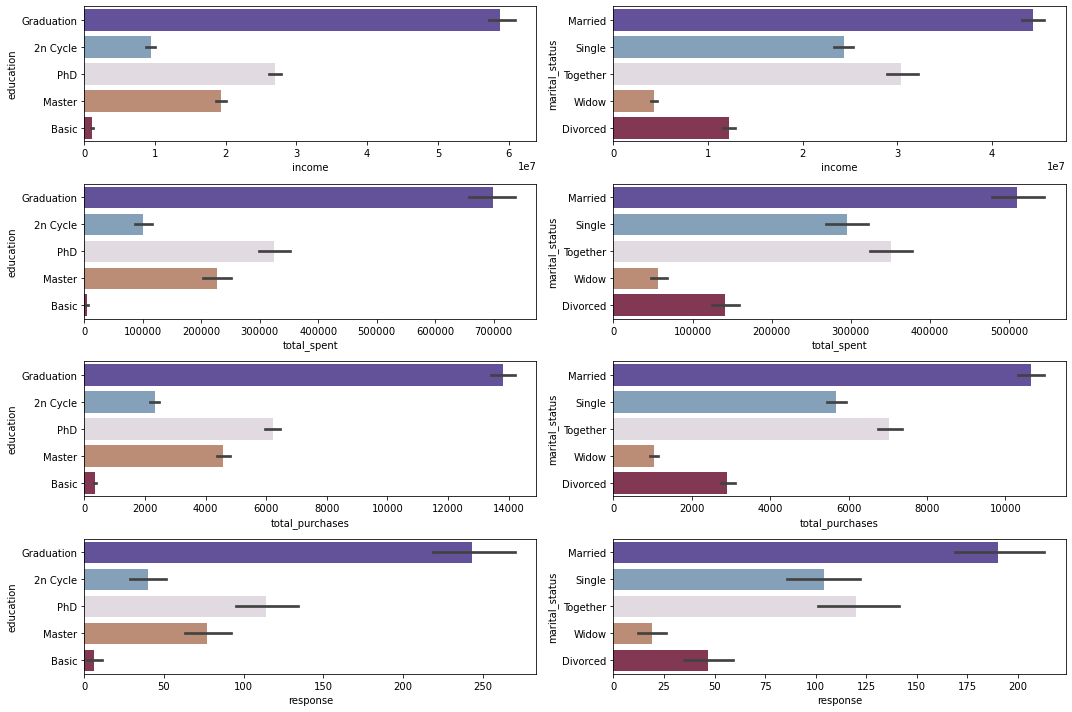

In [9]:
metrics = ['income', 'total_spent', 'total_purchases', 'response']
features = ['education', 'marital_status']

fig = plt.figure(figsize=(15, 10))
gs = GridSpec(ncols = 2, nrows = 4, figure = fig)
c = 0
r = 0



for feature in features:
    for i, metric in enumerate(metrics):
        grouped = df.groupby('education', as_index = False)[feature].sum().reset_index()
        plt.subplot(gs[c, r])
        ax = sns.barplot(data = df, x = df[metric], y = df[feature], estimator = np.sum, palette = 'twilight_shifted')
        c+=1
    c=0
    r+=1
    
  
    
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Income vs. Total Spendings')

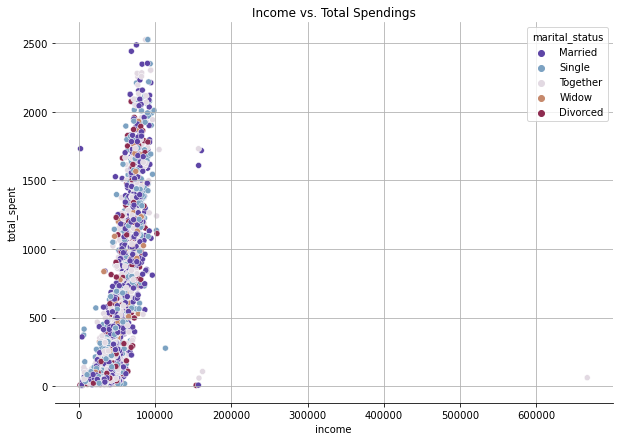

In [10]:
plt.figure(figsize=(10,7)) 
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'marital_status', palette = 'twilight_shifted')
plt.grid(True)
sns.despine(left=True)
plt.title('Income vs. Total Spendings')

Outlier by income:

In [11]:
df.query('income  > 600000')

,user_id,year_birth,education,marital_status,income,kidhome,teenhome,dt_enrolled,recency,amt_wine,...,cmp3_accepted,cmp4_accepted,cmp5_accepted,complain,response,age,total_kids,total_spent,total_purchases,income_level
2236,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,47,1,62,10,high


Let's take a closer look cutting off the outlying records:

Text(0.5, 1.0, 'Income vs. Total Spendings (no outlier)')

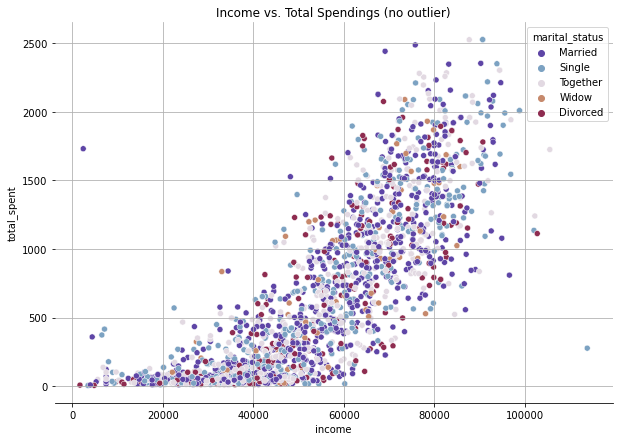

In [12]:
plt.figure(figsize=(10,7)) 
sns.scatterplot(data = df[df['income'] < df['income'].mean() + df['income'].std()*3], x = 'income', y = 'total_spent', hue = 'marital_status', palette = 'twilight_shifted')
plt.grid(True)
plt.title
sns.despine(left=True)  
plt.title('Income vs. Total Spendings (no outlier)')

Text(0.5, 1.0, 'Income vs. Total Purchases')

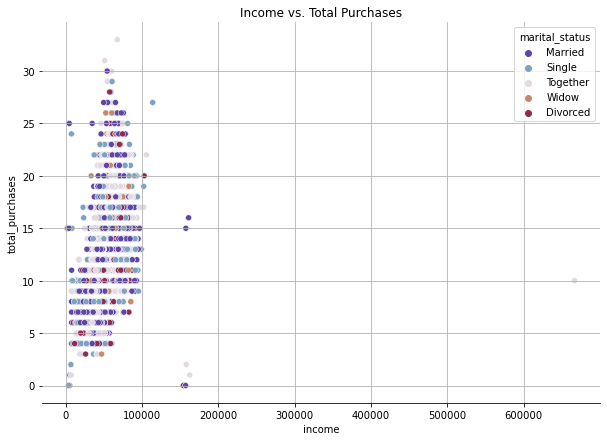

In [13]:
fig = plt.figure(figsize=(10,7)) 
ax = sns.scatterplot(data = df, x = 'income', y = 'total_purchases', hue = 'marital_status', palette = 'twilight_shifted')
plt.grid(True)
sns.despine(left=True)   
plt.title('Income vs. Total Purchases')

Once again, without the outliers:

Text(0.5, 1.0, 'Income vs. Total Purchases (no outlier)')

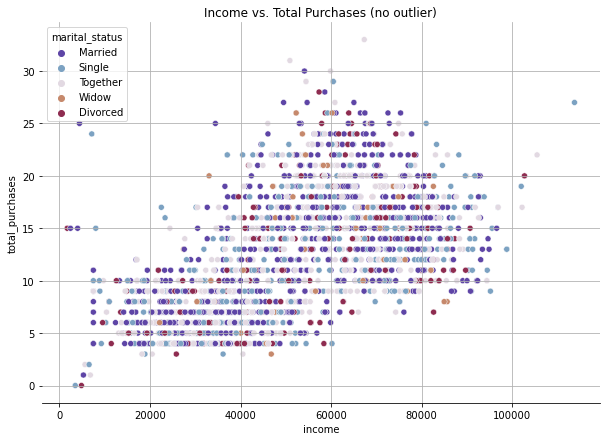

In [15]:
fig = plt.figure(figsize=(10,7)) 
ax = sns.scatterplot(data = df[df['income'] < df['income'].mean() + df['income'].std()*3], x = 'income', y = 'total_purchases', hue = 'marital_status', palette = 'twilight_shifted')
plt.grid(True)
sns.despine(left=True)  
plt.title('Income vs. Total Purchases (no outlier)')

The highest spending belongs to married people with no children:

Text(0.5, 1.0, 'Number of children & marital status vs. total spendings')

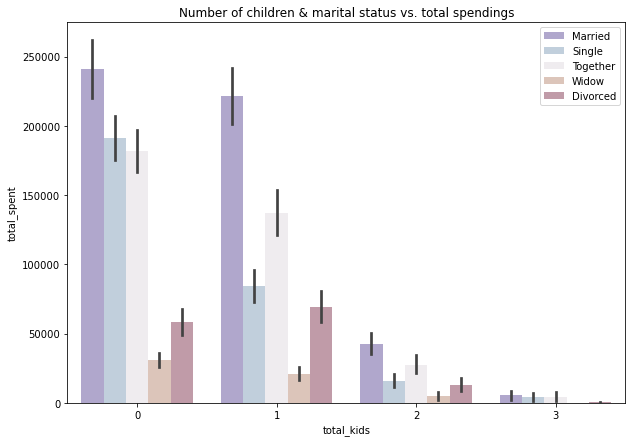

In [16]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(data = df, x = 'total_kids', y = 'total_spent', hue = 'marital_status', estimator = np.sum, palette = 'twilight_shifted', alpha = 0.5)
ax.legend(loc='upper right')
plt.title('Number of children & marital status vs. total spendings')

The most purchases were done by married people with 1 kid:

Text(0.5, 1.0, 'Number of children & marital status vs. total purchases')

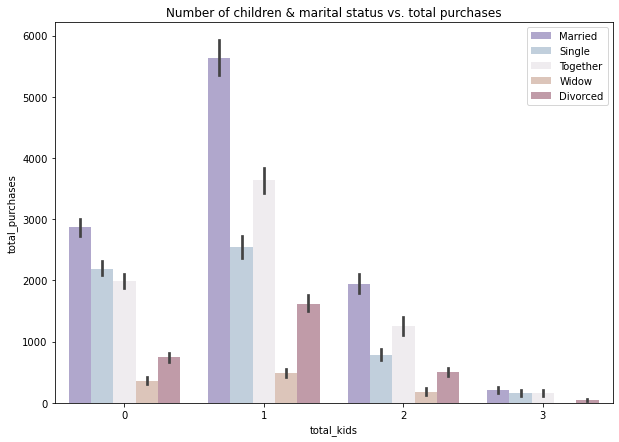

In [18]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(data = df, x = 'total_kids', y = 'total_purchases', hue = 'marital_status', estimator = np.sum, palette = 'twilight_shifted', alpha = 0.5)
ax.legend(loc='upper right')
plt.title('Number of children & marital status vs. total purchases')